About Dataset

This dataset includes information on food choices, nutrition, preferences, childhood favorites, and other information from college students.

There are 125 responses from students. Data is raw and unnedaded.

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [211]:
df = pd.read_csv("food_coded.csv")

In [212]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [214]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,125.0,1.392000,0.490161,1.0,1.0,1.0,2.0,2.0
breakfast,125.0,1.112000,0.316636,1.0,1.0,1.0,1.0,2.0
calories_chicken,125.0,577.320000,131.214156,265.0,430.0,610.0,720.0,720.0
calories_day,106.0,3.028302,0.639308,2.0,3.0,3.0,3.0,4.0
calories_scone,124.0,505.241935,230.840506,315.0,420.0,420.0,420.0,980.0
coffee,125.0,1.752000,0.433590,1.0,2.0,2.0,2.0,2.0
comfort_food_reasons_coded,106.0,2.698113,1.972042,1.0,2.0,2.0,3.0,9.0
cook,122.0,2.786885,1.038351,1.0,2.0,3.0,3.0,5.0
comfort_food_reasons_coded.1,125.0,2.688000,1.910987,1.0,2.0,2.0,3.0,9.0
cuisine,108.0,1.388889,0.974759,1.0,1.0,1.0,1.0,6.0


In [215]:
# Check the total no. of null values in each column:
print(df.isnull().sum())

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         26
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64


In [266]:
df['sports'].fillna(1, inplace=True)
df['sports'].unique()

array([1., 2.])

In [217]:
# Clean up column GPA
df['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

In [218]:
# Convert non-numeric values to NaN
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')
# Calculate the mean value
mean_GPA = df['GPA'].mean()
# Replace NaN values with the mean value
df['GPA'].fillna(mean_GPA, inplace=True)

In [219]:
df['GPA'].unique()

array([2.4       , 3.654     , 3.3       , 3.2       , 3.5       ,
       2.25      , 3.8       , 3.904     , 3.4       , 3.6       ,
       3.1       , 3.41555833, 4.        , 2.2       , 3.87      ,
       3.7       , 3.9       , 2.8       , 3.        , 3.65      ,
       3.89      , 2.9       , 3.605     , 3.83      , 3.292     ,
       3.35      , 2.6       , 3.67      , 3.73      , 2.71      ,
       3.68      , 3.75      , 3.92      , 3.77      , 3.63      ,
       3.882     ])

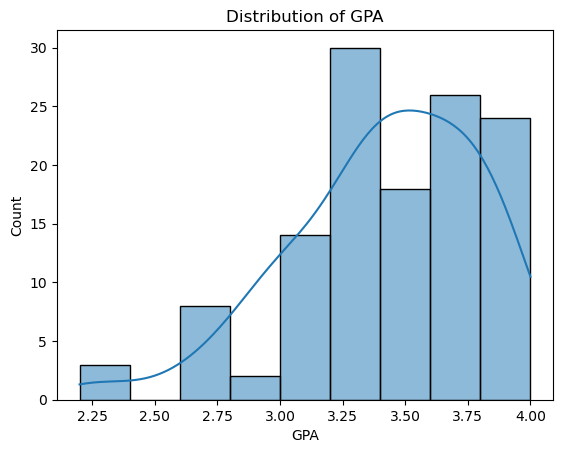

In [270]:
# Distribution of GPA
sns.histplot(df['GPA'], kde=True)
plt.title('Distribution of GPA')
plt.show()

In [221]:
df['weight'].unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

In [222]:
# Clean up weight column
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
mean_weight = df['weight'].mean()
df['weight'].fillna(mean_weight, inplace=True)
df['weight'].unique()

array([187. , 155. , 158.5, 190. , 180. , 137. , 125. , 116. , 110. ,
       264. , 123. , 185. , 145. , 170. , 135. , 165. , 175. , 195. ,
       105. , 160. , 167. , 115. , 205. , 128. , 150. , 140. , 120. ,
       100. , 113. , 168. , 169. , 200. , 265. , 192. , 118. , 210. ,
       112. , 130. , 127. , 129. , 260. , 184. , 230. , 138. , 156. ])

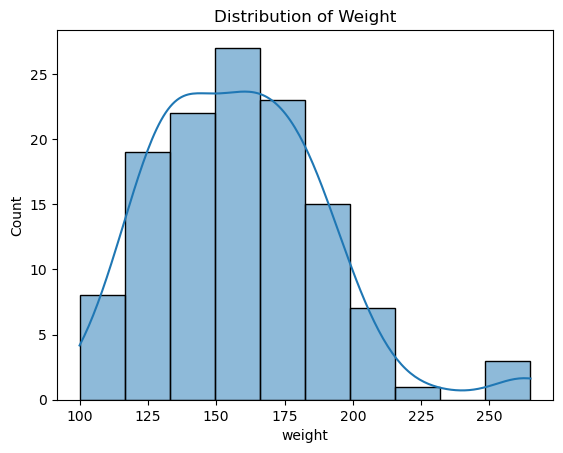

In [223]:
# Distribution of Weight
sns.histplot(df['weight'], kde=True)
plt.title('Distribution of Weight')
plt.show()

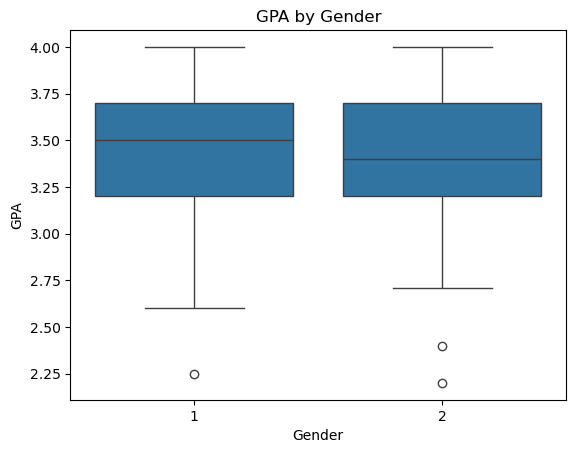

In [225]:
# Box plot of GPA by gender
sns.boxplot(x='Gender', y='GPA', data=df)
plt.title('GPA by Gender')
plt.show()

Now, let's perform the t-test to compare the GPA of two groups based on gender.

Compare GPA between males (gender = 1) and females (gender = 2).

In [240]:
# Subset the data by gender
group1 = df[df['Gender'] == 1]['GPA']
group2 = df[df['Gender'] == 2]['GPA']

# Perform the t-test
t_stat, p_value = ttest_ind(group1, group2)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis, indicating a significant difference in GPA between males and females.")
else:
    print("Fail to reject the null hypothesis, indicating no significant difference in GPA between males and females.")

T-statistic: 0.8038238241839988
P-value: 0.42304949409657333
Fail to reject the null hypothesis, indicating no significant difference in GPA between males and females.


Let's run a t-test to compare the weights of people who play sport and those who don't.

In [252]:
# Subset the date by athletes and non-athletes

athlete = df[df['sports'] == 1]['weight']
non_athlete = df[df['sports'] == 2]['weight']

# Perform the t-test
t_stat, p_value = ttest_ind(group1, group2)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis, indicating a significant difference in difference in weights between athletes and non athletes.")
else:
    print("Fail to reject the null hypothesis, indicating no significant difference in weights between athletes and non athletes.")

T-statistic: 0.8038238241839988
P-value: 0.42304949409657333
Fail to reject the null hypothesis, indicating no significant difference in weights between athletes and non athletes.


Lets perform a t-test to check whether there is a relationship between feeling healthy and the weight of a person.

In [268]:
Feeling_healthy = df[df['healthy_feeling']<=5]['weight']
NotFeeling_healthy = df[df['healthy_feeling']>=6]['weight']

# Perform the t-test
t_stat, p_value = ttest_ind(group1, group2)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis, indicating no significant difference between weight and feeling healthy.")
else:
    print("Fail to reject the null hypothesis, indicating a significant difference between weight and feeling healthy.")

T-statistic: 0.8038238241839988
P-value: 0.42304949409657333
Fail to reject the null hypothesis, indicating a significant difference between weight and feeling healthy.


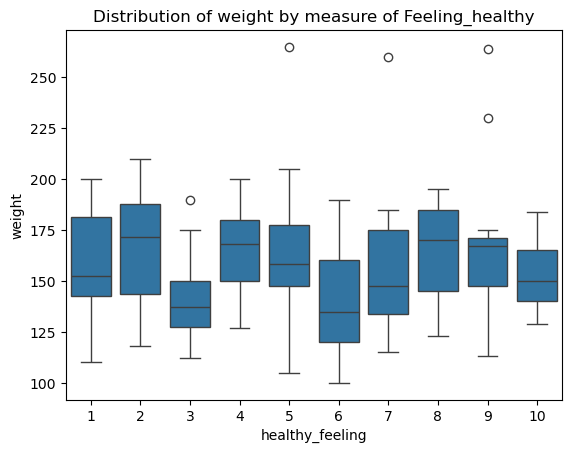

In [280]:
# Box plot of GPA by gender
sns.boxplot(x='healthy_feeling', y='weight', data=df)
plt.title('Distribution of weight by measure of Feeling_healthy')
plt.show()